# Test Trained Model

In [1]:
import shutil
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('../')
from torchsummary.torchsummary import summary
from dataloaderNoob import VOC
import numpy as np
import matplotlib.pyplot as plt
import yolov1_small_test
from utilities.utils import detection_collate_test
from utilities.utils import save_checkpoint
from yolov1_small_test import detection_loss

# 1. Set Device & hyperparameters

In [2]:
print("torch.cuda.is_available():", torch.cuda.is_available())

use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')

num_epochs = 16000
num_classes = 1
batch_size = 5
learning_rate = 1e-3
dropout_prop = 0.5

torch.cuda.is_available(): True


# 2. Set Dataset

In [3]:
DATASET_PATH_MARTIN = "/media/keti-ai/AI_HARD3/DataSets/VOC_Pascal/VOC/VOCdevkit/VOC2012"
DATASET_PATH_JAEWON = "H:\VOC\VOC12\VOCdevkit_2\VOC2012"
SMALL_DATASET_PATH = "H:/person-300"
train_dataset = VOC(root = SMALL_DATASET_PATH,
                    transform=transforms.ToTensor(), cls_option = True, selective_cls="person")


VOC Parsing:   |████████████████████████████████████████| 100.0% (300/300)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (300/300)  Complete



In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           collate_fn=detection_collate_test)

# 3. Load checkpoint

In [5]:
checkpoint = torch.load("../checkpoints/checkpoint_2700.pth.tar")

# 4. Load Model

In [6]:
net = yolov1_small_test.SmallYOLOv1()

In [7]:
# visualize_weights_distribution(net)
use_cuda = torch.cuda.is_available()

In [8]:
#device = torch.device("cuda" if use_cuda else "cpu")
device = torch.device("cuda")
model = yolov1_small_test.SmallYOLOv1().to(device)
#model = torch.nn.DataParallel(net, device_ids=[0]).cuda()
#summary(model, (3, 448,448))

In [9]:
model.load_state_dict(checkpoint['state_dict'])

# 5. Read Images

In [10]:
images, labels, sizes = iter(train_loader).next()
images = images.to(device)
labels = labels.to(device)

In [11]:
#for just a image
outputs = model(torch.cuda.FloatTensor(images))
print(outputs.shape)

torch.Size([5, 7, 7, 6])


# 6. Get & Plot Original Images

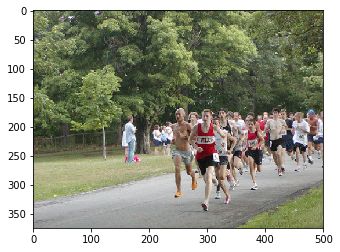

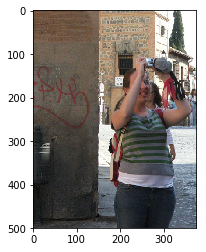

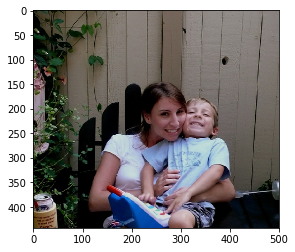

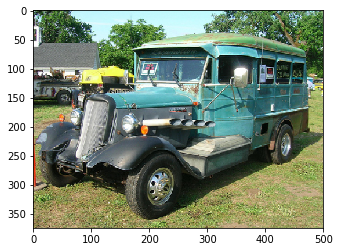

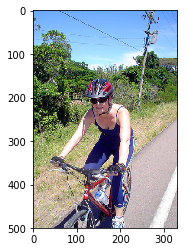

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

resizedImages = []

for num in range(batch_size):
    current_Image = images[num]
    
    src = np.transpose(current_Image,(1,2,0))
    src = src * 255
    src = src.numpy().astype(np.uint8).copy()

    resizedImages.append(cv2.resize(src,sizes[num]))
    plt.imshow(resizedImages[num])                  
    plt.show()

# 7. split the image into a grid (7x7)

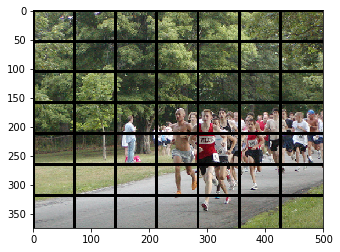

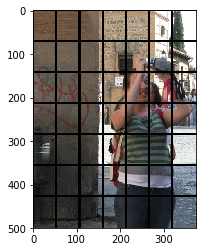

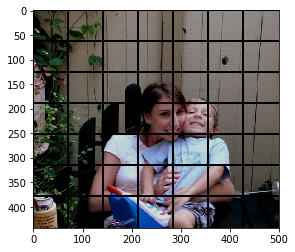

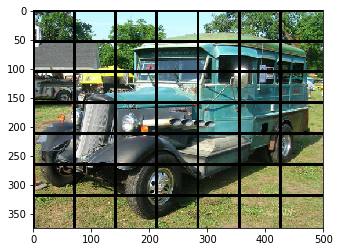

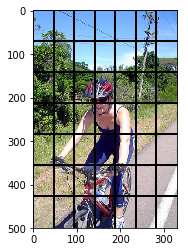

In [13]:
def DrawGrid7x7(src, sizes):
    dst = src.copy()
    
    for i in range(7):
        width = sizes[0]
        height = sizes[1]
        unit_x = sizes[0] // 7
        unit_y = sizes[1] // 7
        
        img = cv2.line(src, (unit_x*i, 0), (unit_x*i, height), (0,0,0), 3)
        img = cv2.line(src, (0, unit_y*i), (width, unit_y*i), (0,0,0), 3)
        
    return img

for num in range(batch_size):
    dst = DrawGrid7x7(resizedImages[num], sizes[num])   
    plt.imshow(dst)
    plt.show()

# 8. Draw Ground Truth Grids & BBoxes

**Ground Truth Grid**

In [14]:
def DrawPatches(src, coords, sizes):
    dst = src.copy()
    print('coord : ',coords)
    for coord in coords:
        width = sizes[0]
        height = sizes[1]
        unit_x = (sizes[0] // 7)
        unit_y = (sizes[1] // 7)
        
        img = cv2.rectangle(dst, 
                            (unit_x * coord[1], unit_y * coord[0]), 
                            (unit_x * coord[1] + unit_x, unit_y * coord[0] + unit_y), 
                            (255,0,0), 3)
        #img = cv2.line(src, (0, unit_y*i), (width, unit_y*i), (0,0,0), 3)
        
    return img

coord :  [[3, 2], [3, 3], [3, 4]]
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])


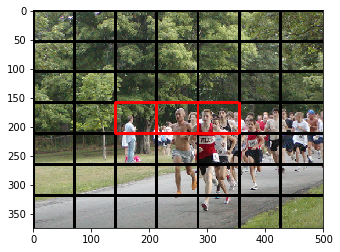

coord :  [[3, 4]]
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])


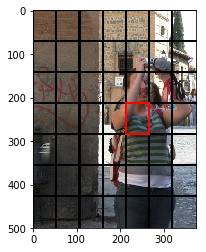

coord :  [[3, 2], [3, 3]]
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])


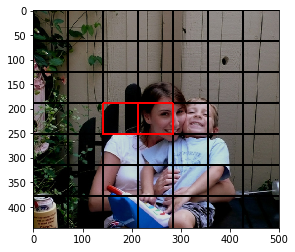

coord :  [[1, 5]]
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])


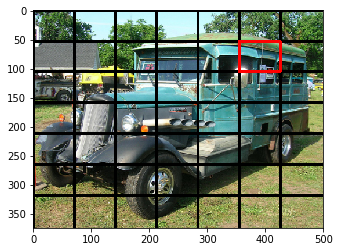

coord :  [[3, 1]]
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])


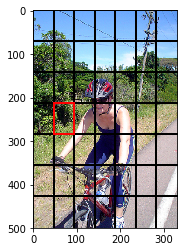

In [15]:

for idx in range(batch_size):
    coords = []
    gridCoords = np.where(labels[idx,:,:,0]==1)
    numObjects = len(gridCoords[0])


    for num in range(numObjects):
        X = gridCoords[1][num]
        Y = gridCoords[0][num]
        coords.append([X,Y])
    
    dst = DrawPatches(resizedImages[idx],coords, sizes[idx])
    print(np.transpose(labels[idx,:,:,0],(1,0)))
    plt.imshow(dst)
    plt.show()

**Bounding Box**

In [18]:
def calcMinMaxXY(indice_xy, norm_xywh, original_wh):
    x_index = indice_xy[0] + 1
    y_index = indice_xy[1] + 1
        
    width = norm_xywh[2]  * original_wh[0]
    height = norm_xywh[3] * original_wh[1]
  
    center_x = (norm_xywh[0] + x_index / 7) * original_wh[0]
    center_y = (norm_xywh[1] + y_index / 7) * original_wh[1]
    
    xMin = center_x - width / 2
    yMin = center_y - height / 2
    xMax = center_x + width / 2
    yMax = center_y + height / 2

    return xMin, yMin, xMax, yMax, center_x, center_y, width, height

(X, Y): 3 5
(tensor(373.6000, device='cuda:0'), tensor(195.9000, device='cuda:0'), tensor(27.2000, device='cuda:0'), tensor(44.1000, device='cuda:0'))


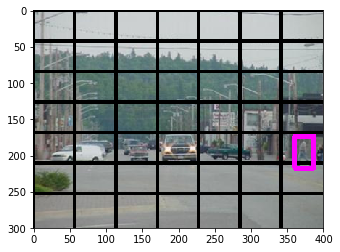

(X, Y): 3 0
(tensor(99.5000, device='cuda:0'), tensor(220.1250, device='cuda:0'), tensor(67., device='cuda:0'), tensor(205.8750, device='cuda:0'))
(X, Y): 2 1
(tensor(144.0000, device='cuda:0'), tensor(203.6250, device='cuda:0'), tensor(70., device='cuda:0'), tensor(202.8750, device='cuda:0'))
(X, Y): 2 2
(tensor(268., device='cuda:0'), tensor(187.1250, device='cuda:0'), tensor(64., device='cuda:0'), tensor(204.0000, device='cuda:0'))
(X, Y): 2 3
(tensor(322.5000, device='cuda:0'), tensor(207., device='cuda:0'), tensor(57., device='cuda:0'), tensor(168., device='cuda:0'))
(X, Y): 2 4
(tensor(368., device='cuda:0'), tensor(195.3750, device='cuda:0'), tensor(72., device='cuda:0'), tensor(177., device='cuda:0'))


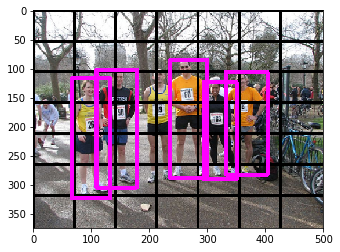

(X, Y): 2 0
(tensor(103., device='cuda:0'), tensor(205.8750, device='cuda:0'), tensor(168., device='cuda:0'), tensor(337.8750, device='cuda:0'))
(X, Y): 3 4
(tensor(376.0000, device='cuda:0'), tensor(220.8750, device='cuda:0'), tensor(156., device='cuda:0'), tensor(307.8750, device='cuda:0'))


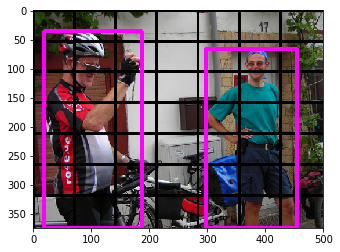

(X, Y): 3 5
(tensor(467., device='cuda:0'), tensor(251.6250, device='cuda:0'), tensor(16., device='cuda:0'), tensor(31.1250, device='cuda:0'))


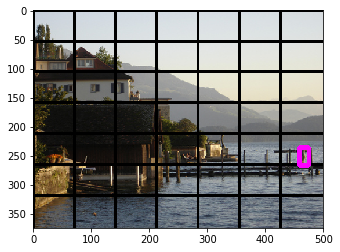

(X, Y): 2 1
(tensor(126.0720, device='cuda:0'), tensor(266.5000, device='cuda:0'), tensor(214.1370, device='cuda:0'), tensor(467., device='cuda:0'))


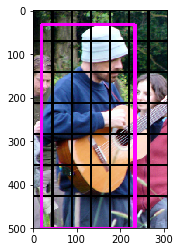

In [19]:
for num in range(batch_size):
    result = np.where(labels[num,:,:,0]==1)
    numObjects = len(result[0])
    original_wh = [sizes[num][0],sizes[num][1]]
    dst = resizedImages[num].copy()

    for idx in range(int(numObjects)):
        X = int(result[1][idx])
        Y = int(result[0][idx])
        print('(X, Y):',X,Y)

        indice_xy = [result[0][idx], result[1][idx]]
        norm_xywh = [labels[num,Y,X,2],labels[num,Y,X,3],labels[num,Y,X,4],labels[num,Y,X,5]]
        #original_wh = [size[0][0],size[0][1]]
    
        result2 = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
        print(result2[4:9])
        dst = cv2.rectangle(dst,(result2[0], result2[1]),(result2[2], result2[3]),(255,0,255),5)
    plt.imshow(dst)
    plt.show()

    # output tensor slice
    objness1_output = output[:, :, :, 0]
    x_offset1_output = output[:, :, :, 1]
    y_offset1_output = output[:, :, :, 2]
    width_ratio1_output = output[:, :, :, 3]
    height_ratio1_output = output[:, :, :, 4]
    class_output = output[:, :, :, 5]

    # label tensor slice
    objness_label = target[:, :, :, 0]
    class_label = target[:, :, :, 1]
    x_offset_label = target[:, :, :, 2]
    y_offset_label = target[:, :, :, 3]
    width_ratio_label = target[:, :, :, 4]
    height_ratio_label = target[:, :, :, 5]

# 1. Confidence

In [ ]:
print(outputs[num,:,:,0])
print(labels[num,:,:,0])

# 2. class output

In [20]:
print(outputs[0,:,:,5])
print(labels[0,:,:,1])

tensor([[ 0.1700,  0.1457, -0.0000,  0.0000,  0.1416, -0.5145, -0.1419],
        [ 0.5090, -0.0000,  0.0000,  0.2845,  0.1484, -0.1910, -0.0000],
        [-0.6547,  0.3548, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0000, -0.0000,  0.3524,  0.0000, -0.0000,  0.0000],
        [ 0.7502,  0.4253, -0.0000,  0.0000,  0.0000,  0.0293,  0.5390],
        [ 0.1957, -0.0000,  0.5735,  0.0000,  0.0000, -0.0523,  0.1066],
        [ 0.0000,  0.0000, -0.0000, -0.3445, -0.0000,  0.1300,  0.1579]], device='cuda:0')
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]], device='cuda:0')


# 3. W/H

In [ ]:
width_ratio_label = labels[:, :, :, 4]
height_ratio_label = labels[:, :, :, 5]

print(width_ratio_label * 448)
print(height_ratio_label* 448)

In [ ]:
result = np.where(labels[0,:,:,0]==1)
X = result[1][0]
Y = result[0][0]
src = np.transpose(current_Image,(1,2,0))
src = src * 255
src = src.numpy().astype(np.uint8).copy()

indice_xy = [result[0][0], result[1][0]]
norm_xywh = [labels[0,Y,X,2],labels[0,Y,X,3],labels[0,Y,X,4],labels[0,Y,X,5]]
#original_wh = [size[0][0],size[0][1]]
original_wh = [500,332]
result = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
dst = cv2.resize(src, (original_wh[0],original_wh[1]))
dst = cv2.rectangle(dst,(result[0], result[1]),(result[2], result[3]),(255,0,255),5)
plt.imshow(dst)

In [ ]:
result = np.where(labels[0,:,:,0]==1)
numObjects = len(result[0])

original_wh = [500,332]
dst = cv2.resize(src, (original_wh[0],original_wh[1]))

for idx in range(int(numObjects)):
    print('iter : ',idx)
    X = int(result[1][idx])
    Y = int(result[0][idx])
    print('X : ',X)
    print('Y : ',Y)
    src = np.transpose(current_Image,(1,2,0))
    src = src * 255
    src = src.numpy().astype(np.uint8).copy()

    indice_xy = [result[0][idx], result[1][idx]]
    norm_xywh = [labels[0,Y,X,2],labels[0,Y,X,3],labels[0,Y,X,4],labels[0,Y,X,5]]
    #original_wh = [size[0][0],size[0][1]]
    
    result2 = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
    
    dst = cv2.rectangle(dst,(result2[0], result2[1]),(result2[2], result2[3]),(255,0,255),5)
plt.imshow(dst)
plt.show()

In [ ]:
idx

 # output tensor slice
    objness1_output = output[:, :, :, 0]
    x_offset1_output = output[:, :, :, 1]
    y_offset1_output = output[:, :, :, 2]
    width_ratio1_output = output[:, :, :, 3]
    height_ratio1_output = output[:, :, :, 4]
    class_output = output[:, :, :, 5]

In [ ]:
inference = outputs[num,:,:,0] > 0.7 
result = np.where(inference==1)
numObjects = len(result[0])
original_wh = [500,375]
dst = cv2.resize(src, (original_wh[0],original_wh[1]))

for idx in range(int(numObjects)):
    print('iter : ',idx)
    X = int(result[1][idx])
    Y = int(result[0][idx])
    print('X : ',X)
    print('Y : ',Y)
    src = np.transpose(current_Image,(1,2,0))
    src = src * 255
    src = src.numpy().astype(np.uint8).copy()
    indice_xy = [result[0][idx], result[1][idx]]
    norm_xywh = [outputs[0,Y,X,1],outputs[0,Y,X,2],outputs[0,Y,X,3],outputs[0,Y,X,4]]
    result2 = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
    dst = cv2.rectangle(dst,(result2[0], result2[1]),(result2[2], result2[3]),(255,0,255),5)
    
plt.imshow(dst)
plt.show()

In [ ]:
inference

In [ ]:
labels[0,Y,X,1]